# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression
import scipy.optimize as opt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

from scipy.optimize import lsq_linear
from sklearn.linear_model import LinearRegression

# Функция для настройки весов w и смещения b с использованием метода наименьших квадратов
def f(X_train, y_train):
    x = np.ones((len(X_train), 2))
    x[:, 0] = X_train.flatten()
    res = lsq_linear(x, y_train)
    w = res.x[0]
    b = res.x[1]
    return w, b

# Функция для вычисления MSE и MAE
def errors(X_test, y_test, w, b):
    xx = np.ones((len(X_test), 2))
    xx[:, 0] = X_test.flatten()
    y_pred = xx.dot([w, b])
    mse = np.mean((y_pred - y_test) ** 2)
    mae = np.mean(np.abs(y_pred - y_test))
    return mse, mae

# Вычисляем MSE и MAE с использованием модели sklearn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
mse_sklearn = np.mean((y_pred_sklearn - y_test) ** 2)
mae_sklearn = np.mean(np.abs(y_pred_sklearn - y_test))

w, b = f(X_train, y_train)
mse, mae = errors(X_test, y_test, w, b)

print(f'MSE: {mse}, MAE: {mae}')
print(f'Sklearn MSE: {mse_sklearn}, Sklearn MAE: {mae_sklearn}')

MSE: 102.57868385763112, MAE: 7.811594826607807
Sklearn MSE: 102.57868385763113, Sklearn MAE: 7.811594826607809


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### Попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

# Создание матрицы X и вектора y
X = np.column_stack((data['x_train'], np.ones(len(data['x_train']))))
y = data['y_train']

# Нахождение параметров w и b с помощью метода наименьших квадратов
w, b = np.linalg.lstsq(X, y, rcond=None)[0]
print(f"w = {w}, b = {b}")

# Предсказание значений y на основе полученных параметров
y_pred = np.dot(X, [w, b])

# Расчет метрик MSE и MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

w = -0.2724620809326335, b = 1.8253058821513026
MSE: 0.27830057939900205
MAE: 0.44285372836499787


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

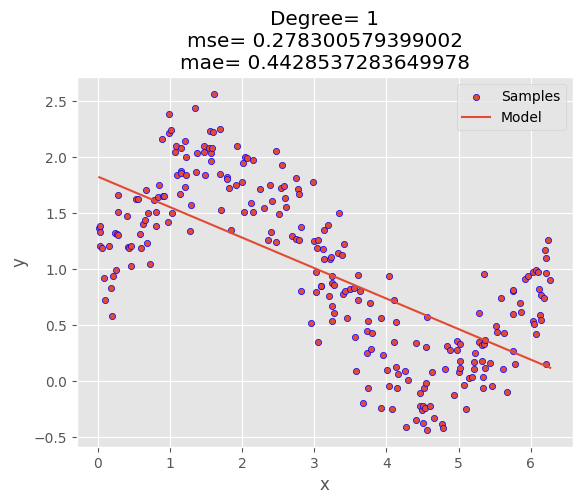

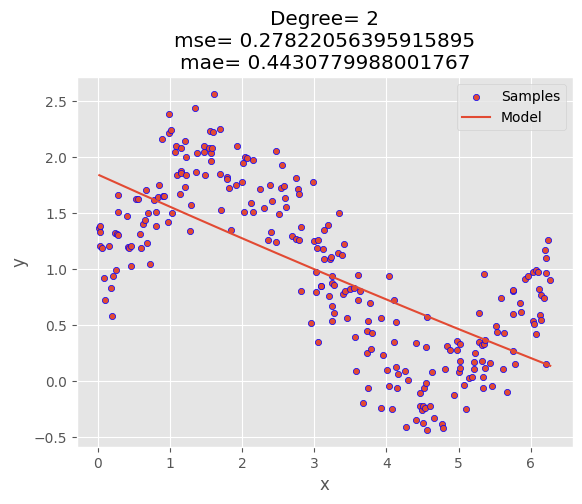

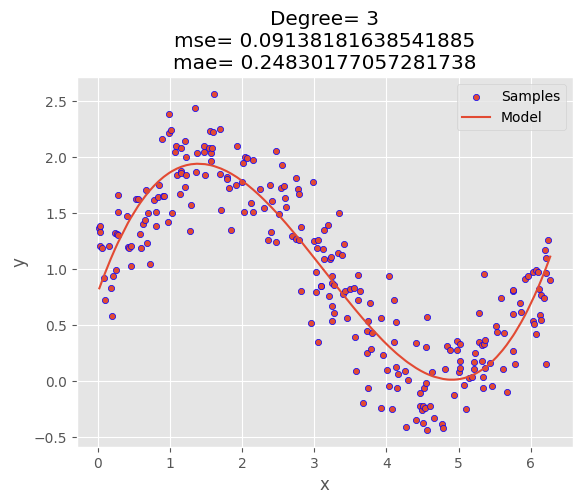

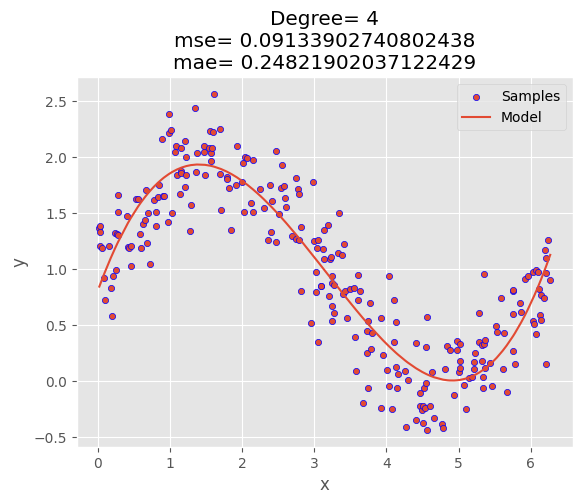

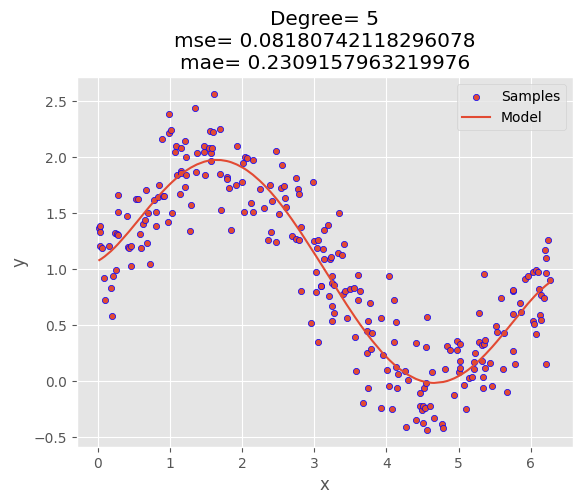

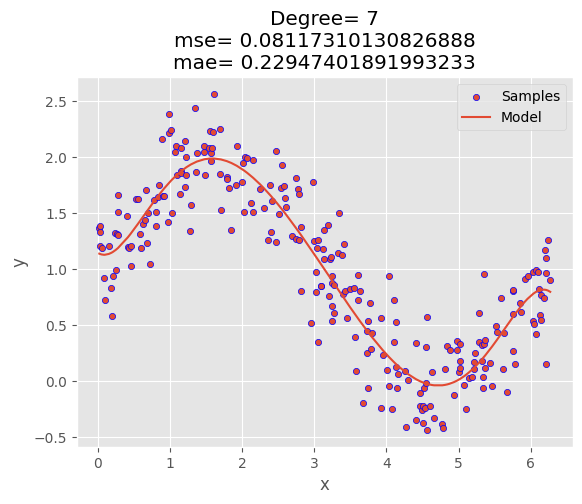

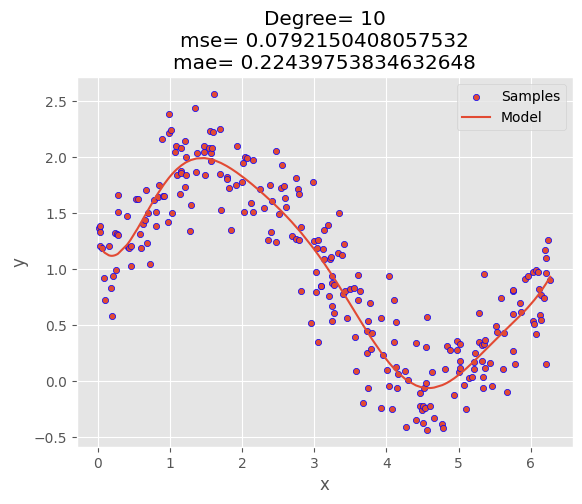

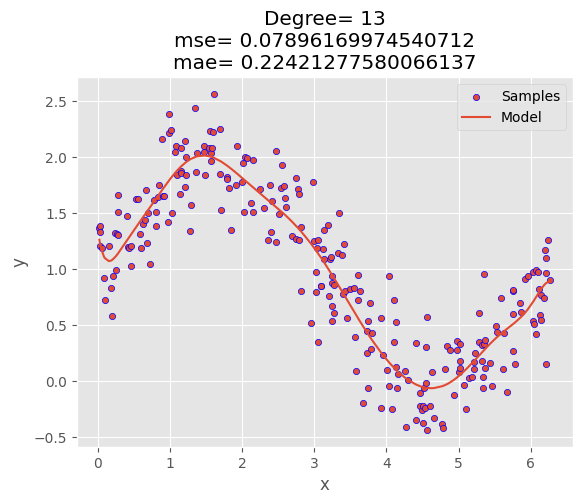

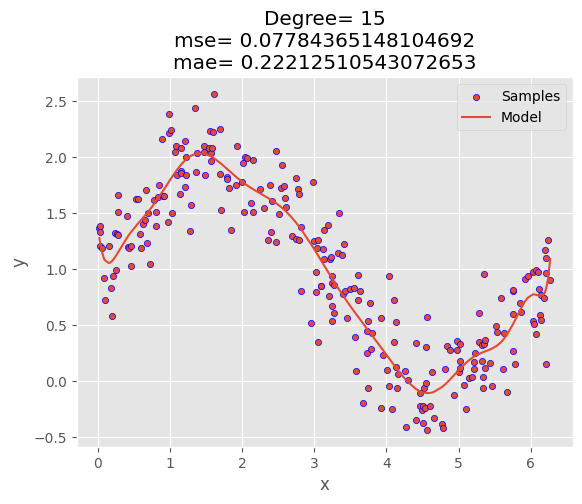

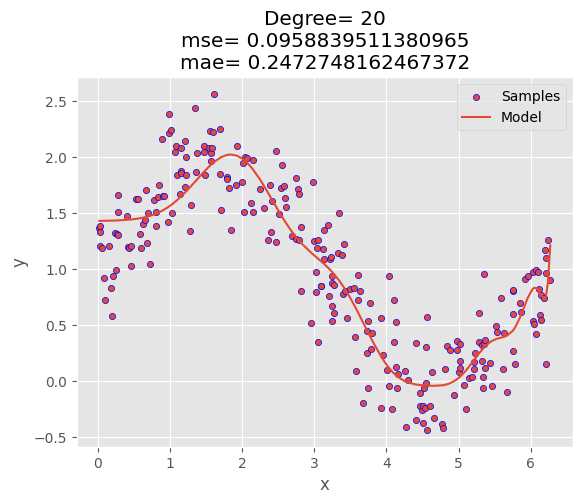

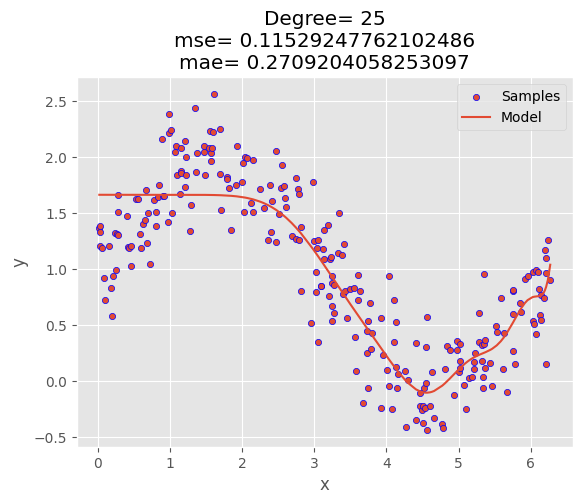

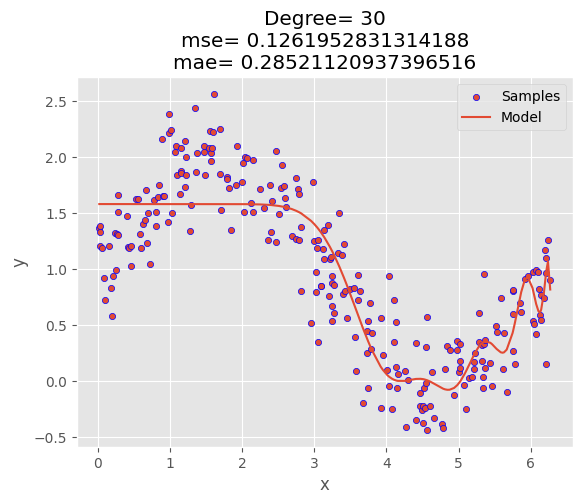

In [ ]:
from scipy.special import y1
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def f(degree, X_train, y_train, X_test):
  poly = PolynomialFeatures(degree=degree)
  poly_ = poly.fit_transform(X_train.reshape(-1,1))
  poly_reg_model = LinearRegression().fit(poly_, y_train)
  x = poly.fit_transform(X_test.reshape(-1,1))
  y = poly_reg_model.predict(x)
  return y



X_train = data['x_train']
X_test = data['x_train']
y_train=y
y_test =y
degrees = [1, 2, 3, 4, 5, 7, 10, 13, 15, 20, 25, 30]
for i in range(len(degrees)):
   y = f(degrees[i],X_train, y_train, X_test)
   mse = mean_squared_error(y_test, y)
   mae = mean_absolute_error(y_test, y)
   plt.figure()
   plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
   plt.plot(X_test, y, label="Model")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.legend(loc="best")
   plt.title("Degree= " + str(degrees[i]) + "\nmse= " + str(mse) + "\nmae= "+ str(mae))
   plt.show()

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
!pip install scikit-learn==1.1.3
from sklearn.datasets import load_boston

ImportError: ignored

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

In [ ]:
house_data = load_boston()

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

# Разделение данных на признаки (X) и целевую переменную (y)
X = house_data.data
y = house_data.target

# Используется SelectKBest и f_regression для выбора наиболее значимых признаков
selector = SelectKBest(f_regression, k=7)
X_reduced = selector.fit_transform(X, y)

# Разделение данных на тренировочный и тестовый наборы для полного и усеченного наборов данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии на полном наборе данных
regressor_full = LinearRegression()
regressor_full.fit(X_train, y_train)

# Прогнозирование значений на тестовом наборе данных и вычисление метрик качества для полного набора данных
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)
mae_full = mean_absolute_error(y_test, y_pred_full)

# Создание и обучение модели линейной регрессии на усеченном наборе данных
regressor_reduced = LinearRegression()
regressor_reduced.fit(X_reduced_train, y_reduced_train)

# Прогнозирование значений на тестовом наборе данных и вычисление метрик качества для усеченного набора данных
y_pred_reduced = regressor_reduced.predict(X_reduced_test)
mse_reduced = mean_squared_error(y_reduced_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_reduced_test, y_pred_reduced)

# Вывод значений метрик качества для обоих наборов данных
print("MSE (Full Dataset):", mse_full)
print("MAE (Full Dataset):", mae_full)
print("MSE (Reduced Dataset):", mse_reduced)
print("MAE (Reduced Dataset):", mae_reduced)
